In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob



In [6]:
#2
files = glob.glob("states*.csv")
df = []
for filename in files:
  data = pd.read_csv(filename)
  df.append(data)
us_census = pd.concat(df)
print(us_census.head())  



   Unnamed: 0           State  TotalPop             Hispanic  \
0           0    Rhode Island   1053661  13.356666666666678%   
1           1  South Carolina   4777576   5.056684981684991%   
2           2    South Dakota    843190  3.2396396396396376%   
3           3       Tennessee   6499615   4.720026972353339%   
4           4           Texas  26538614   38.04673809068304%   

                 White                Black                Native  \
0   74.32541666666665%    5.68291666666667%   0.3462500000000001%   
1  62.888736263736185%   28.75091575091577%   0.2923992673992673%   
2   82.50090090090092%  1.4238738738738752%    9.417567567567566%   
3   73.49008766014822%  18.283816587997297%  0.22663519892110592%   
4  44.687908934379145%   11.65004782858236%  0.26114405969007126%   

                 Asian                Pacific               Income  \
0  3.2474999999999983%  0.035833333333333335%  $59125.270833333336   
1   1.249175824175822%  0.046978021978021964%  $46296.807763

In [7]:
print(us_census.columns)
print(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


In [8]:
print(us_census.head())


   Unnamed: 0           State  TotalPop             Hispanic  \
0           0    Rhode Island   1053661  13.356666666666678%   
1           1  South Carolina   4777576   5.056684981684991%   
2           2    South Dakota    843190  3.2396396396396376%   
3           3       Tennessee   6499615   4.720026972353339%   
4           4           Texas  26538614   38.04673809068304%   

                 White                Black                Native  \
0   74.32541666666665%    5.68291666666667%   0.3462500000000001%   
1  62.888736263736185%   28.75091575091577%   0.2923992673992673%   
2   82.50090090090092%  1.4238738738738752%    9.417567567567566%   
3   73.49008766014822%  18.283816587997297%  0.22663519892110592%   
4  44.687908934379145%   11.65004782858236%  0.26114405969007126%   

                 Asian                Pacific               Income  \
0  3.2474999999999983%  0.035833333333333335%  $59125.270833333336   
1   1.249175824175822%  0.046978021978021964%  $46296.807763

In [9]:
us_census["Income"] = us_census.Income.str[1:]
us_census["Income"] = pd.to_numeric(us_census.Income)

In [10]:
gender_split = us_census.GenderPop.str.split('_')
us_census["Men"] = gender_split.str.get(0)
us_census["Women"] = gender_split.str.get(1)

In [11]:
us_census["Men"] = us_census["Men"].str[:-1]
us_census["Women"] = us_census["Women"].str[:-1]

us_census["Men"] = pd.to_numeric(us_census.Men)
us_census["Women"] = pd.to_numeric(us_census.Women)
print(us_census.head())

   Unnamed: 0           State  TotalPop             Hispanic  \
0           0    Rhode Island   1053661  13.356666666666678%   
1           1  South Carolina   4777576   5.056684981684991%   
2           2    South Dakota    843190  3.2396396396396376%   
3           3       Tennessee   6499615   4.720026972353339%   
4           4           Texas  26538614   38.04673809068304%   

                 White                Black                Native  \
0   74.32541666666665%    5.68291666666667%   0.3462500000000001%   
1  62.888736263736185%   28.75091575091577%   0.2923992673992673%   
2   82.50090090090092%  1.4238738738738752%    9.417567567567566%   
3   73.49008766014822%  18.283816587997297%  0.22663519892110592%   
4  44.687908934379145%   11.65004782858236%  0.26114405969007126%   

                 Asian                Pacific        Income  \
0  3.2474999999999983%  0.035833333333333335%  59125.270833   
1   1.249175824175822%  0.046978021978021964%  46296.807763   
2  1.019369

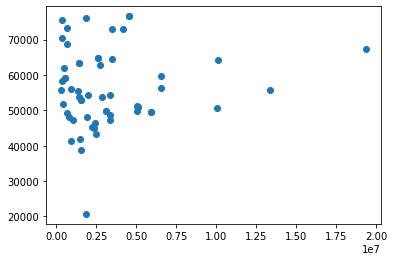

In [12]:
plt.scatter(us_census.Women, us_census.Income)
plt.show()

In [13]:
us_census = us_census.fillna(value={"Women":us_census.TotalPop - us_census.Men})
print(us_census.Women)

0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
0     3057895.0
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1      504536.0
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5     3057895.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
Name: Women, dtype: float64


In [14]:
duplicates = us_census.duplicated()
print(duplicates.value_counts())

False    60
dtype: int64


In [15]:
us_census = us_census.drop_duplicates(subset=['State'])
duplicates_check = us_census.duplicated()
print(duplicates_check.value_counts())

False    51
dtype: int64


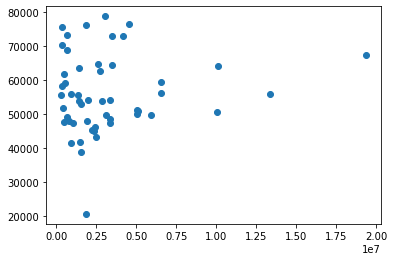

In [17]:
plt.cla()
plt.scatter(us_census.Women, us_census.Income)
plt.show()


In [19]:
us_census['Hispanic'] = us_census.Hispanic.str[:-1]
us_census['Hispanic'] = pd.to_numeric(us_census.Hispanic)


In [20]:
us_census['White'] = us_census.White.str[:-1]
us_census['White'] = pd.to_numeric(us_census.White)

In [21]:
us_census['Black'] = us_census.Black.str[:-1]
us_census['Black'] = pd.to_numeric(us_census.Black)

In [23]:
us_census['Native'] = us_census.Native.str[:-1]
us_census['Native'] = pd.to_numeric(us_census.Native)
us_census['Asian'] = us_census.Asian.str[:-1]
us_census['Asian'] = pd.to_numeric(us_census.Asian)
us_census['Pacific'] = us_census.Pacific.str[:-1]
us_census['Pacific'] = pd.to_numeric(us_census.Pacific)

In [25]:
us_census = us_census.fillna(value={
'Hispanic': us_census.Hispanic.mean(),
'White': us_census.White.mean(),
'Black': us_census.Black.mean(),
'Native': us_census.Native.mean(),
'Asian': us_census.Asian.mean(),
'Pacific': us_census.Pacific.mean(),
})

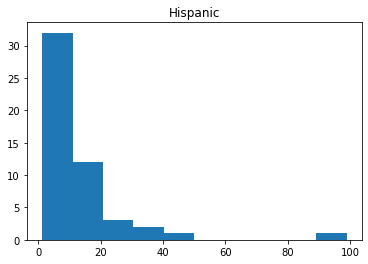

In [28]:
plt.hist(us_census['Hispanic'])
plt.title('Hispanic')
plt.show()


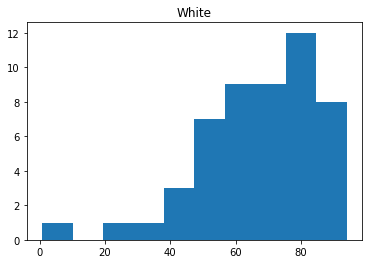

In [29]:
plt.hist(us_census['White'])
plt.title('White')
plt.show()

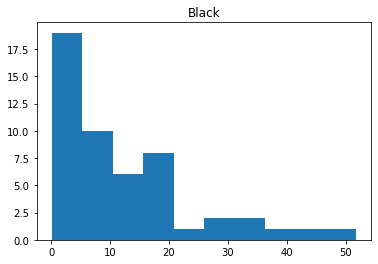

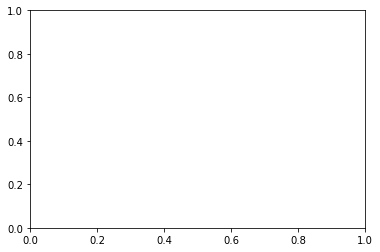

In [30]:
plt.hist(us_census['Black'])
plt.title('Black')
plt.show()


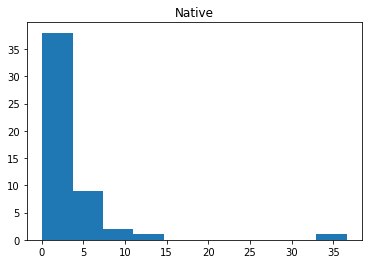

In [31]:
plt.hist(us_census['Native'])
plt.title('Native')
plt.show()


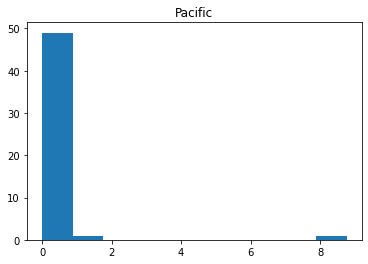

In [32]:
plt.hist(us_census['Pacific'])
plt.title('Pacific')
plt.show()

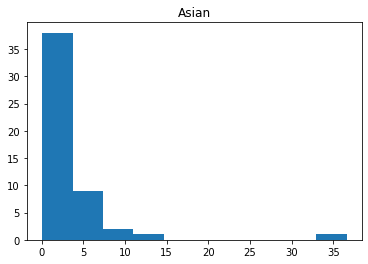

In [33]:
plt.hist(us_census['Asian'])
plt.title('Asian')
plt.show()

In [34]:
print(us_census.head())
print(us_census.dtypes)

   Unnamed: 0           State  TotalPop   Hispanic      White      Black  \
0           0    Rhode Island   1053661  13.356667  74.325417   5.682917   
1           1  South Carolina   4777576   5.056685  62.888736  28.750916   
2           2    South Dakota    843190   3.239640  82.500901   1.423874   
3           3       Tennessee   6499615   4.720027  73.490088  18.283817   
4           4           Texas  26538614  38.046738  44.687909  11.650048   

     Native     Asian   Pacific        Income            GenderPop       Men  \
0  3.247500  3.247500  0.035833  59125.270833      510388M_543273F    510388   
1  1.249176  1.249176  0.046978  46296.807763    2322409M_2455167F   2322409   
2  1.019369  1.019369  0.041892  51805.405405      423477M_419713F    423477   
3  1.407283  1.407283  0.043156  47328.083617    3167756M_3331859F   3167756   
4  3.669696  3.669696  0.068816  55874.522601  13171316M_13367298F  13171316   

        Women  
0    543273.0  
1   2455167.0  
2    419713.0 